# Multidimensional data processing

> Setelah membaca chapter ini, pembaca diharapkan dapat
> - Memahami struktur data multidimensi (NetCDF) dan cara membacanya menggunakan Xarray.
> - Mengolah data multidimensi dengan operasi manipulasi dan komputasi dasar.

## Intro

Pada mata pelatihan sebelumnya, kita telah mencoba mengolah data tabular menggunakan pandas. Namun, data meteorologi-oseanografi, khususnya yang berasal dari keluaran model, tidak mudah disimpan dalam bentuk tabular. 

Data keluaran model terdiri dari banyak dimensi (waktu, latitude, longitude, kedalaman/ketinggian). Misalnya, parameter temperatur pada suatu tempat di muka bumi direpresentasikan dengan tiga dimensi.

$$ T(x,y,t) $$

dimana $x, y,$ dan $t$ masing-masing menandakan longitude, latitude, dan waktu.

Pada bagian ini, kita akan mempelajari bagaimana xarray dapat dengan mudah untuk mengolah struktur data seperti ini.

## Struktur data multi dimensi

Setidaknya terdapat empat terminologi penting dalam data multi dimensi (yang disimpan sepeti dalam format netcdf), yaitu variabel, koordinat, dimensi atau indeks, serta atribut.
- **variabel**: array multi dimensi berisi variabel fisis seperti suhu udara, presipitasi, tinggi gelombang, dll. Direpresentasikan oleh koordinat (latitude, longitude, dan waktu).
- **koordinat**: wadah seperti dictionary yang menyimpan label dan array dua dimensi berisi dimensi.
- **dimensi**: dimensi dari masing-masing koordinat (longitude, latitude, time).
- **atribut**: dictionary untuk menyimpan metadata.

<div align="center"><img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" alt="xarray" width="600"/><br>***</div>

Lebih spesifik, struktur data utama dalam Xarray terbagi menjadi dua, yaitu DataArray dan Dataset.

#### DataArray
Ini merupakan implementasi dari xarray untuk menyimpan array multi dimensi. Beberapa properti penting antara lain:
- **values**: array multi dimensi yang menyimpan nilai dari satu variabel tertentu
- **dims**: dimensi dari masing-masing sumbu
- **coords**: wadah seperti dictionary yang menyimpan label dan dimensi
- **attrs**: dictionary penyimpan metadata

#### Dataset
Xarray Dataset berisi kumpulan dari DataArray yang disimpan dalam wadah berbentuk dictionary. Properti penting antara lain:
- **data_vars**: wadah seperti dictionary untuk menyimpan DataArray
- **dims**: dimensi dari masing-masing sumbu
- **coords**: wadah seperti dictionary yang menyimpan label dan dimensi
- **attrs**: dictionary penyimpan metadata

## Membaca dataset

Built-in method xarray untuk membuka dataset adalah `xarray.open_dataset`. Method ini dapat digunakan untuk membuka beberapa macam format data multidimensi seperti `netcdf`, `hdf5`, `zarr`, `grib`, `pydap`, dengan menspesifikkan argument `engine`.

Xarray juga mendukung untuk membaca kumpulan file dalam satu kali proses dengan method `xarray.open_mfdataset`. Method ini akan mereturn xarray dataset yang telah mengalami pembagian (`chunking`) secara otomatis. 

Dalam praktik ini, kita akan mencoba untuk membuka dataset hindcast dari BMKG-OFS yang tersimpan dalam database opendap. 

### Load module

In [1]:
# load module

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

#### Single file

In [2]:
dset = xr.open_dataset("http://web.pusmar.id:8082/opendap/inawaves_hindcast/2025/H_hires_202501.nc")
dset

<xarray.Dataset> Size: 14GB
Dimensions:  (time: 249, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2025-01-01 ... 2025-02-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables: (12/17)
    hs       (time, lat, lon) float64 844MB ...
    hmax     (time, lat, lon) float64 844MB ...
    dir      (time, lat, lon) float64 844MB ...
    dp       (time, lat, lon) float64 844MB ...
    lm       (time, lat, lon) float64 844MB ...
    t01      (time, lat, lon) float64 844MB ...
    ...       ...
    ptp00    (time, lat, lon) float64 844MB ...
    ptp01    (time, lat, lon) float64 844MB ...
    ptp02    (time, lat, lon) float64 844MB ...
    pdi00    (time, lat, lon) float64 844MB ...
    pdi01    (time, lat, lon) float64 844MB ...
    pdi02    (time, lat, lon) float64 844MB ...
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

#### Multi file

In [3]:
lifile = [
    "http://web.pusmar.id:8082/opendap/inawaves_hindcast/2025/H_hires_202501.nc",
    "http://web.pusmar.id:8082/opendap/inawaves_hindcast/2025/H_hires_202502.nc"
]
dsetmf = xr.open_mfdataset(lifile)
dsetmf

<xarray.Dataset> Size: 27GB
Dimensions:  (time: 474, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 4kB 2025-01-01 ... 2025-03-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables: (12/17)
    hs       (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    hmax     (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    dir      (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    dp       (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    lm       (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    t01      (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    ...       ...
    ptp00    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    ptp01    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    ptp02    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    pdi00    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    pdi01    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
    pdi02    (time, lat, lon) float64 2GB dask.array<chunksize=(249, 481, 881), meta=np.ndarray>
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

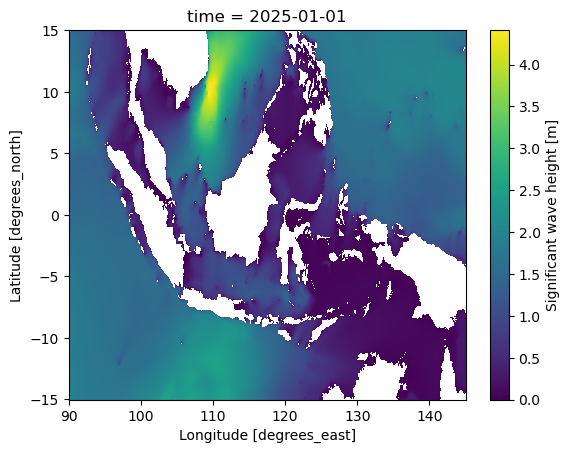

In [4]:
# QUICK VIEW TO THE DATA
dset['hs'][0].plot()

## Manipulasi dataset

### Operasi manipulasi dasar

Operasi umum yang digunakan untuk mengolah dataset xarray antara lain indexing, slicing, interpolating, dan masking. 

| Operasi dasar | | Method |
| :- | :-: | :- |
| Indexing | | regular numpy indexing atau `.sel` atau `.isel` |
| Slicing | | regular numpy slicing atau `.sel` atau `.isel` |
| Interpolating | | `.sel` atau `.interp`|
| Masking | | `.where` |

Method `.sel` dan `.isel` memiliki kemampuan yang sama untuk melakukan seleksi data baik untuk DataArray maupun Dataset (regular numpy indexing hanya berlaku untuk DataArray), namun keduanya terdapat perbedaan mendasar.

| | `.sel` | `.isel` |
| - | - | - |
| Seleksi data | **berdasarkan nilai dari label** dimensi | **berdasarkan index atau urutan** dari nilai dimensi |

---
> Apakah sadar jika terdapat langkah yang terlewat, yang ada di pemrosesan data tabular tapi tidak ada di sini? Ya, kita tidak mempertimbangkan proses pembersihan data karena output model biasanya sudah melalui proses quality control, berbeda dengan raw data tabular dari observasi. Sehingga, fokus kita dititikberatkan pada pemrosesan data lebih lanjut.

#### Indexing

Sebagai percobaan, kita akan melakukan seleksi data untuk 
- variabel `hs`
- waktu ke 1 atau `2025-01-01T00:00:00.000000000`
- lat lon masing masing -15 dan 90 (urutan ke 1)

In [5]:
# REGULAR NUMPY INDEXING => hanya berlaku untuk DataArray

# ingat kembali bahwa indexing di python dimulai dengan 0, bukan 1
hst0 = dset['hs'][0] # select variable hs untuk urutan waktu ke 1
hssel = dset['hs'][0][0,0] # select variable hs untuk urutan waktu ke 1, dan lat lon masing-masing juga ke 1

# cek datanya
display(hst0)
print(hssel.data)

<xarray.DataArray 'hs' (lat: 481, lon: 881)> Size: 3MB
[423761 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Attributes:
    long_name:      Significant wave height
    standard_name:  sea_surface_wave_significant_height
    units:          m

1.9658203125


In [6]:
# .isel => berlaku untuk DataArray dan Dataset

hst0 = dset['hs'].isel(time=0) # select variable hs untuk urutan waktu ke 1
hst0l0 = hst0.isel(lon=0, lat=0) # select variable hs untuk urutan waktu ke 1, dan lat lon masing-masing juga ke 1

# cek datanya
display(hst0)
print(hst0l0.data)

<xarray.DataArray 'hs' (lat: 481, lon: 881)> Size: 3MB
[423761 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Attributes:
    long_name:      Significant wave height
    standard_name:  sea_surface_wave_significant_height
    units:          m

1.9658203125


In [7]:
# .sel => berlaku untuk DataArray dan Dataset

hst0 = dset['hs'].sel(time="2025-01-01T00:00:00.000000000") # select variable hs untuk urutan waktu ke 1
hst0l0 = hst0.sel(lon=90, lat=-15) # select variable hs untuk urutan waktu ke 1, dan lat lon masing-masing juga ke 1

# cek datanyaS
display(hst0)
print(hst0l0.data)

<xarray.DataArray 'hs' (lat: 481, lon: 881)> Size: 3MB
[423761 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Attributes:
    long_name:      Significant wave height
    standard_name:  sea_surface_wave_significant_height
    units:          m

1.9658203125


#### Slicing

Pada dasarnya, slicing diselesaikan menggunakan python built-in function `slice` untuk mendapatkan batas nilai yang diinginkan.

Sebagai percobaan, kita akan melakukan seleksi data untuk 
- variabel `hs`
- waktu ke 1 hingga 8 atau `2025-01-01T00:00:00` hingga `2025-01-01T21:00:00`
- lat lon masing masing -15 - 0 dan 90 - 120

Dalam hal ini, kita tidak akan mengandalkan regular numpy indexing dan `.isel` karena diperlukan proses lanjutan untuk menentukan ada di urutan berapa batas latitude dan longitude yang kita hendaki. Sehingga, kita hanya akan mengandalkan method `.sel` untuk mempermudah pemrosesan.

<xarray.Dataset> Size: 126MB
Dimensions:  (time: 8, lat: 241, lon: 481)
Coordinates:
  * time     (time) datetime64[ns] 64B 2025-01-01 ... 2025-01-01T21:00:00
  * lat      (lat) float32 964B -15.0 -14.94 -14.88 ... -0.125 -0.0625 0.0
  * lon      (lon) float32 2kB 90.0 90.06 90.12 90.19 ... 119.9 119.9 120.0
Data variables: (12/17)
    hs       (time, lat, lon) float64 7MB ...
    hmax     (time, lat, lon) float64 7MB ...
    dir      (time, lat, lon) float64 7MB ...
    dp       (time, lat, lon) float64 7MB ...
    lm       (time, lat, lon) float64 7MB ...
    t01      (time, lat, lon) float64 7MB ...
    ...       ...
    ptp00    (time, lat, lon) float64 7MB ...
    ptp01    (time, lat, lon) float64 7MB ...
    ptp02    (time, lat, lon) float64 7MB ...
    pdi00    (time, lat, lon) float64 7MB ...
    pdi01    (time, lat, lon) float64 7MB ...
    pdi02    (time, lat, lon) float64 7MB ...
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

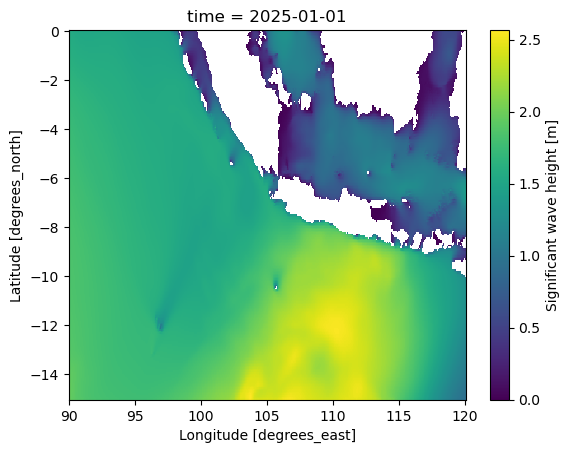

In [8]:
hst08 = dset.sel(time=slice('2025-01-01T00:00:00', '2025-01-01T21:00:00'))
hssel = hst08.sel(lat=slice(-15,0), lon=slice(90,120))

# cek datanya
display(hssel)

# quick plot
hssel['hs'][0].plot()

#### Interpolating

Interpolasi berguna apabila kita perlu menarik data titik yang lokasinya tidak berada persis di titik grid. Selain itu, method `.interp` juga berguna untuk proses regriding.

Interpolasi linear diselesaikan menggunakan metode interpolasi bilinear.

<a href=https://en.wikipedia.org/wiki/Bilinear_interpolation><div align='center'><img src=https://upload.wikimedia.org/wikipedia/commons/a/a7/Bilin3.png><br>***</div></a>

In [9]:
%%time
# .sel nearest
dssel = dset['hs'].isel(time=0).sel(lat=-7.21, lon=121.21, method='nearest')
print(dssel.data)

0.791015625
CPU times: user 7.07 ms, sys: 0 ns, total: 7.07 ms
Wall time: 128 ms


In [10]:
%%time
# .interp
dssel = dset['hs'].isel(time=0).interp(lat=-7.21, lon=121.21, method='linear')
print(dssel.data)

0.7919578124999956
CPU times: user 153 ms, sys: 31.7 ms, total: 185 ms
Wall time: 2.04 s


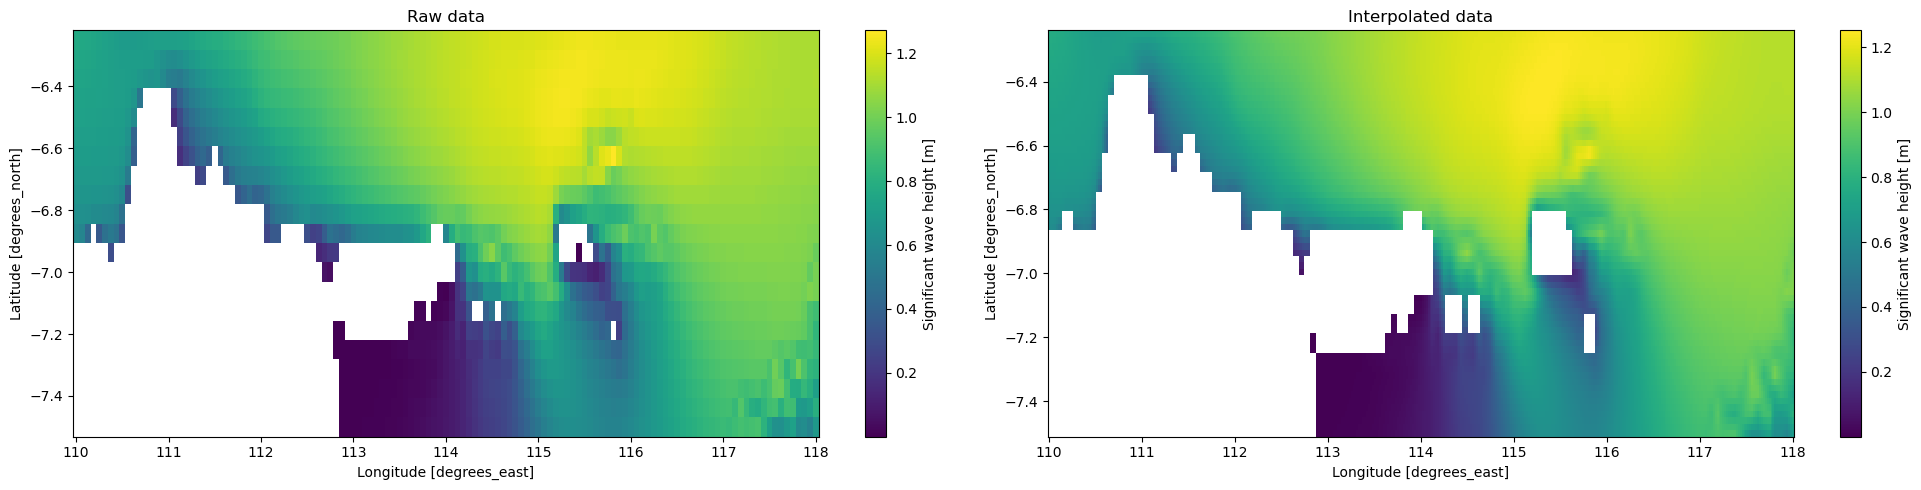

In [11]:
# .interp for regridding
dssel = dset['hs'].isel(time=0).sel(lat=slice(-7.5,-6.25), lon=slice(110,118))

new_lon = np.linspace(dssel.lon[0].data, dssel.lon[-1].data, dssel.sizes['lon']*3)
new_lat = np.linspace(dssel.lat[0].data, dssel.lat[-1].data, dssel.sizes['lat']*3)
dsinterp= dssel.interp(lat=new_lat, lon=new_lon)

# Check datanya
fig, ax = plt.subplots(figsize=(20,5), ncols=2)
dssel.plot(ax=ax[0])
dsinterp.plot(ax=ax[1])
ax[0].set_title("Raw data")
ax[1].set_title("Interpolated data")
plt.tight_layout()
plt.show()

#### Masking

Sebagai percobaan, kita akan memasking daratan khususnya untuk variabel `hs`.

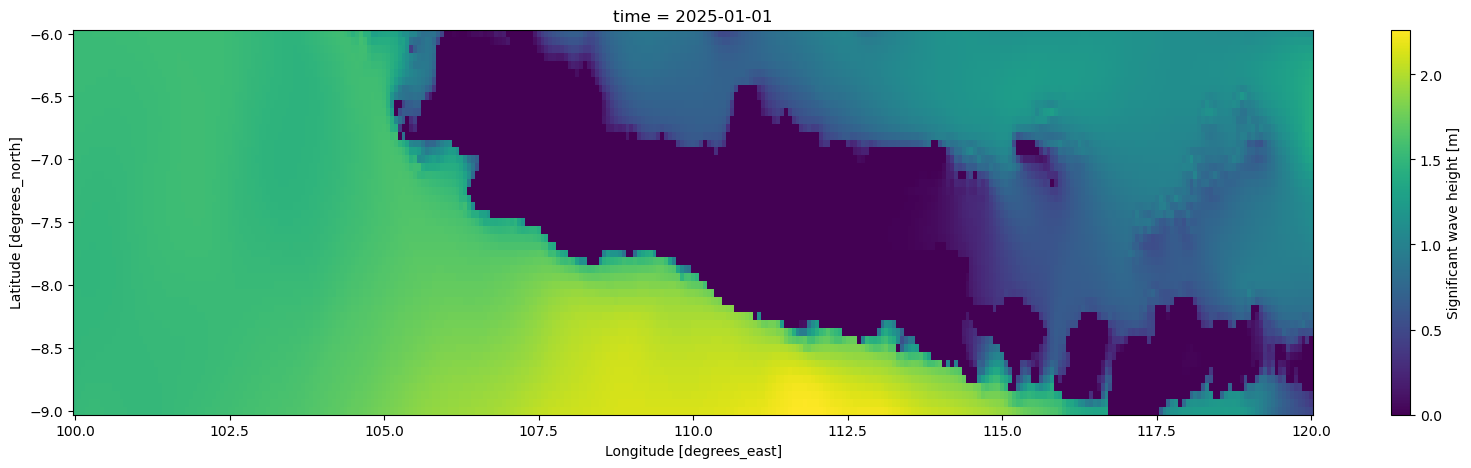

In [12]:
# Membuat dataset unmasked

dsetfilled = dset[['hs']].isel(time=slice(0,1)).sel(lon=slice(100,120), lat=slice(-9, -6)).fillna(0.0)
dsetfilled['hs'].plot(figsize=(20,5))

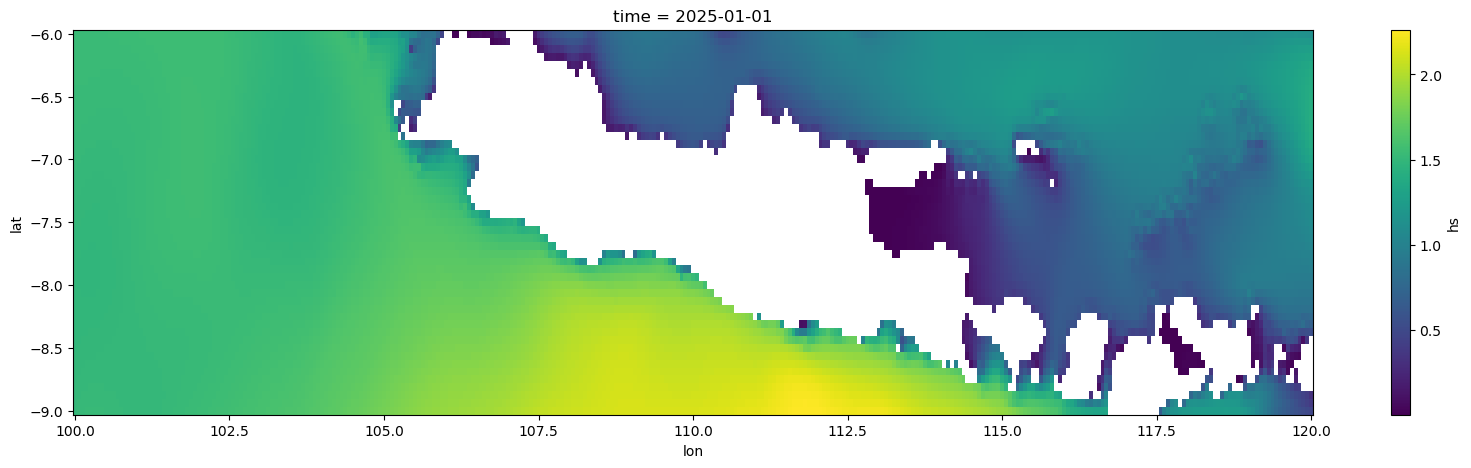

In [13]:
dsetnan = xr.where(dsetfilled != 0, dsetfilled['hs'], np.nan)
dsetnan['hs'].plot(figsize=(20,5))

### Operasi komputasi dasar

#### Aritmatika dasar

Operasi aritmatika dasar, seperti penjumlahan hingga pembagian bisa diaplikasikan pada DataArray. Pada contoh ini, kita akan menghitung komponen `u` dan `v` dari variable `mean_wave_direction`.

In [14]:
dsetwave = dset[['hs','dir']].isel(time=slice(0,1))
dsetwave

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 1, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables:
    hs       (time, lat, lon) float64 3MB ...
    dir      (time, lat, lon) float64 3MB ...
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

In [15]:
%%time
# Operasi aritmatika dasar dapat dilakukan pada DataArray

uwave = np.cos(np.deg2rad(dsetwave['dir']))
vwave = np.sin(np.deg2rad(dsetwave['dir']))
display(uwave)
display(vwave)

<xarray.DataArray 'dir' (time: 1, lat: 481, lon: 881)> Size: 3MB
array([[[ 0.17210372,  0.16820712,  0.16432471, ...,         nan,
                 nan,         nan],
        [ 0.17705455,  0.17327889,  0.16911433, ...,         nan,
                 nan,         nan],
        [ 0.18196738,  0.17894979,  0.17507474, ...,         nan,
                 nan,         nan],
        ...,
        [-0.75432926, -0.73974809, -0.71655166, ..., -0.94174487,
         -0.94391469, -0.95091948],
        [-0.75852099, -0.74429561, -0.72183337, ..., -0.92626806,
         -0.9264029 , -0.93243347],
        [-0.76282485, -0.74486449, -0.72498708, ..., -0.91261412,
         -0.91013789, -0.90739247]]], shape=(1, 481, 881))
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Attributes:
    long_name:      Mean Wave Direction
    standard_name:  sea_surface_mean_wave_from_direction
    units:          degree

<xarray.DataArray 'dir' (time: 1, lat: 481, lon: 881)> Size: 3MB
array([[[ 0.98507883,  0.98575167,  0.9864063 , ...,         nan,
                 nan,         nan],
        [ 0.98420104,  0.9848728 ,  0.98559644, ...,         nan,
                 nan,         nan],
        [ 0.98330457,  0.98385821,  0.98455515, ...,         nan,
                 nan,         nan],
        ...,
        [-0.65649628, -0.67288392, -0.69753403, ..., -0.33632812,
         -0.33018943, -0.30943842],
        [-0.65164861, -0.66785032, -0.6920669 , ..., -0.37686533,
         -0.37653376, -0.3613417 ],
        [-0.64660517, -0.66721578, -0.68876246, ..., -0.40882205,
         -0.41430547, -0.42028432]]], shape=(1, 481, 881))
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Attributes:
    long_name:      Mean Wave Direction
    standard_name:  sea_surface_mean_wave_from_direction
    units:          degree

CPU times: user 109 ms, sys: 8.47 ms, total: 118 ms
Wall time: 4.14 s


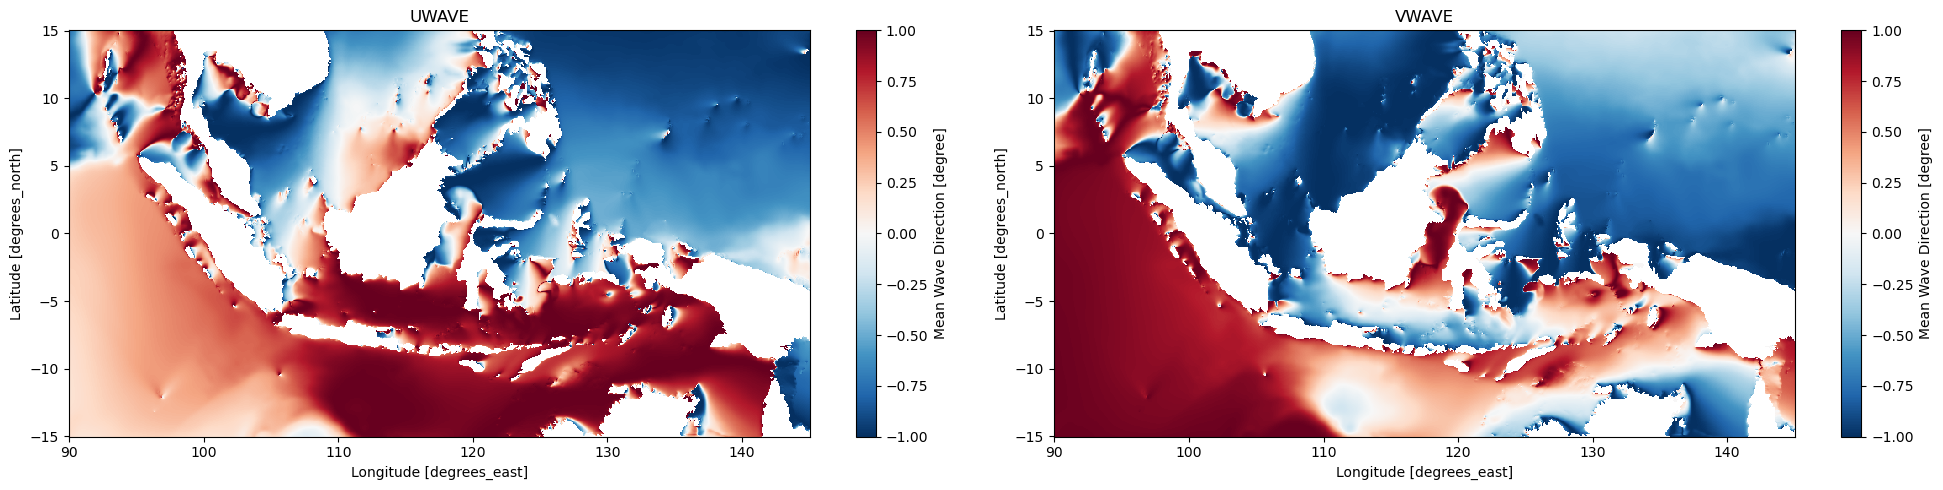

In [16]:
# QUICK PLOT

fig, ax = plt.subplots(figsize=(20,5), ncols=2)
uwave.plot(ax=ax[0])
ax[0].set_title("UWAVE")
vwave.plot(ax=ax[1])
ax[1].set_title("VWAVE")
plt.tight_layout()
plt.show()

Apakah terdapat kekeliruan? Ya, satuan dari komponen gelombang u dan v seharusnya bukan degrees, tapi radians. Ini terjadi karena hasil dari komputasi sebelumnya tidak serta merta mengubah atribut, kecuali hanya menurunkan dari variabel induk (`dset['dir']`).

#### Pembuatan dataset

In [17]:
uvwave = xr.Dataset(
    data_vars={
        'uwave':xr.DataArray(
            dims=['time', 'lat', 'lon'], 
            data=uwave.data,
            coords={'time': uwave.time.data, 'lat': uwave.lat.data, 'lon': uwave.lon.data},
            attrs={
                'long_name': 'U Component of Wave',
                'units': None,
            }
        ),
        'vwave':xr.DataArray(
            dims=['time', 'lat', 'lon'], 
            data=vwave.data,
            coords={'time': uwave.time.data, 'lat': uwave.lat.data, 'lon': uwave.lon.data},
            attrs={
                'long_name': 'V Component of Wave',
                'units': None
            }
        ),
    },
    coords={
        'time':('time', uwave.time.data, dsetwave.time.attrs),
        'lat': ('lat', uwave.lat.data, dsetwave.lat.attrs),
        'lon': ('lon', uwave.lon.data, dsetwave.lon.attrs)
    },
    attrs=dsetwave.attrs
)
uvwave

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 1, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables:
    uwave    (time, lat, lon) float64 3MB 0.1721 0.1682 ... -0.9101 -0.9074
    vwave    (time, lat, lon) float64 3MB 0.9851 0.9858 ... -0.4143 -0.4203
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

#### Penggabungan

Terdapat dua method umum untuk menggabungkan dua dataset, yaitu `.merge` dan `.concat`.

| `.merge` | `.concat` |
| - | - |
| Menggabungkan beberapa Dataset yang memiliki variabel yang berbeda, namun dimensi yang sama | Menggabungkan beberapa dataset yang memiliki variabel yang sama, namun dimensi yang berbeda |

##### merge

In [18]:
dsetuvwave = xr.merge([dsetwave, uvwave])
dsetuvwave

<xarray.Dataset> Size: 14MB
Dimensions:  (time: 1, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables:
    hs       (time, lat, lon) float64 3MB ...
    dir      (time, lat, lon) float64 3MB 80.09 80.32 80.54 ... -155.5 -155.1
    uwave    (time, lat, lon) float64 3MB 0.1721 0.1682 ... -0.9101 -0.9074
    vwave    (time, lat, lon) float64 3MB 0.9851 0.9858 ... -0.4143 -0.4203
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

##### concat

In [19]:
ds1 = dsetwave
ds2 = dset[['hs', 'dir']].isel(time=slice(1,2))
xr.concat([ds1, ds2], dim='time') # concatenate dataset along time axis

<xarray.Dataset> Size: 14MB
Dimensions:  (time: 2, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 16B 2025-01-01 2025-01-01T03:00:00
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables:
    hs       (time, lat, lon) float64 7MB 1.966 1.958 1.949 ... 1.479 1.452
    dir      (time, lat, lon) float64 7MB 80.09 80.32 80.54 ... -156.0 -155.6
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

Bagaimana jika kita menggabungkan dataset yang memiliki variabel dan dimensi yang berbeda? Menggunakan `.concat`, namun variabel akan terbroadcast dengan nilai `NaN` apabila di salah satu dataset tidak terdapat variabel tersebut. Perhatikan contoh berikut.

In [20]:
dsetconcat = xr.concat([dsetuvwave, ds2], dim='time')
dsetconcat

<xarray.Dataset> Size: 27MB
Dimensions:  (time: 2, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 16B 2025-01-01 2025-01-01T03:00:00
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables:
    hs       (time, lat, lon) float64 7MB 1.966 1.958 1.949 ... 1.479 1.452
    dir      (time, lat, lon) float64 7MB 80.09 80.32 80.54 ... -156.0 -155.6
    uwave    (time, lat, lon) float64 7MB 0.1721 0.1682 0.1643 ... nan nan nan
    vwave    (time, lat, lon) float64 7MB 0.9851 0.9858 0.9864 ... nan nan nan
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

Dataset yang diatas menghasilkan nilai `NaN` untuk variabel `uwave` dan `vwave` pada dimensi waktu kedua. 

Kita bisa memeriksanya dengan method `.isnull` dan `.sum` untuk melihat jumlah dan proporsi nilainya.

In [21]:
df_nan_pct = (
    (dsetconcat.isnull().sum(dim=('lat', 'lon')) / (dsetconcat.sizes['lat'] * dsetconcat.sizes['lon']) * 100)
    .to_dataframe()
)
df_nan_pct

,hs,dir,uwave,vwave
time,,,,
2025-01-01 00:00:00,18.336751,18.336751,18.336751,18.336751
2025-01-01 03:00:00,18.336751,18.336751,100.000000,100.000000


In [22]:
dfcek = (
    (dsetconcat.isnull().sum(dim=('lat','lon')) / 
    (dsetconcat.sizes['lat'] * dsetconcat.sizes['lon']))*100
).to_dataframe()
dfcek

,hs,dir,uwave,vwave
time,,,,
2025-01-01 00:00:00,18.336751,18.336751,18.336751,18.336751
2025-01-01 03:00:00,18.336751,18.336751,100.000000,100.000000


#### Agregasi

Metode agregasi yang umum digunakan untuk mereduksi dimensi Dataset antaran lain parameter statistik (`.mean`, `.max`, `.min`, `.std`, `.sum`, `.count`, `.quantile`, `.median`), `.groupby`, `.resample`, dan `.rolling`.

| Method | Keterangan |
| - | - |
| Parameter statistik (`.mean`, `.max`, `.min`, `.std`, `.sum`, `.count`, `.quantile`, `.median`) | Agregasi berdasarkan perhitungan statistik |
| `.groupby` | Mengelompokkan data berdasarkan label waktu atau kategori lain |
| `.resample` | Mengubah frekuensi data waktu (upsample atau downsample) |
| `.rolling` | Menghitung agregasi dengan jendela geser (rolling window) |

In [23]:
dsetsel = dset[['hs']].sel(lat=slice(-7.5,-6.25), lon=slice(110,118))
dsetsel

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 249, lat: 21, lon: 129)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2025-01-01 ... 2025-02-01
  * lat      (lat) float32 84B -7.5 -7.438 -7.375 -7.312 ... -6.375 -6.312 -6.25
  * lon      (lon) float32 516B 110.0 110.1 110.1 110.2 ... 117.9 117.9 118.0
Data variables:
    hs       (time, lat, lon) float64 5MB ...
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

##### Agregasi statistik

In [24]:
%%time

dsmean = dsetsel.mean(dim=['lon', 'lat'])
dsmax  = dsetsel.max(dim=['lon', 'lat'])
dsmin  = dsetsel.min(dim=['lon', 'lat'])
dsstd  = dsetsel.std(dim=['lon', 'lat'])
dssum  = dsetsel.sum(dim=['lon', 'lat'])
dscount  = dsetsel.count(dim=['lon', 'lat'])
dsquantile  = dsetsel.quantile(.75, dim=['lon', 'lat'])
dsmedian  = dsetsel.median(dim=['lon', 'lat'])

lids = [dsmean, dsmax, dsmin, dsstd, dssum, dscount, dsquantile, dsmedian]

CPU times: user 168 ms, sys: 16.1 ms, total: 185 ms
Wall time: 4.96 s


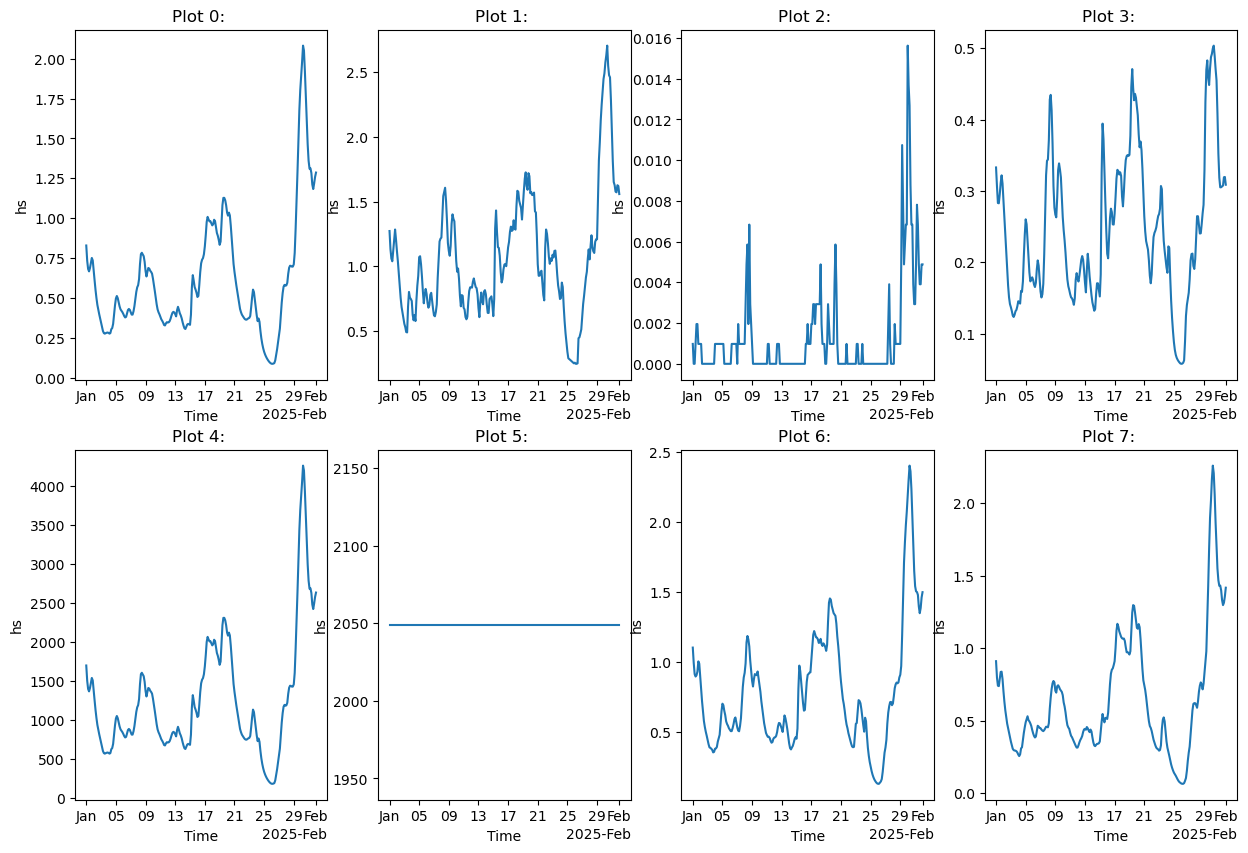

In [25]:
ncols, nrows = 4, 2
fig, ax = plt.subplots(figsize=(15, 10), ncols=ncols, nrows=nrows)
for i in range(ncols * nrows):
    col = i % ncols
    row = i // ncols
    lids[i]['hs'].plot(ax=ax[row, col])  # Note: ax[row, col] for 2D subplot
    ax[row, col].set_title(f'Plot {i}: {lids[i].attrs.get("title", "")}')

##### Groupby

In [26]:
dfgrouped = dsetsel.groupby('time.hour')

for key, val in dfgrouped:
    print(key, type(val))
    
dfhourlymean = dfgrouped.mean()
dfhourlymean

0 <class 'xarray.core.dataset.Dataset'>
3 <class 'xarray.core.dataset.Dataset'>
6 <class 'xarray.core.dataset.Dataset'>
9 <class 'xarray.core.dataset.Dataset'>
12 <class 'xarray.core.dataset.Dataset'>
15 <class 'xarray.core.dataset.Dataset'>
18 <class 'xarray.core.dataset.Dataset'>
21 <class 'xarray.core.dataset.Dataset'>


<xarray.Dataset> Size: 174kB
Dimensions:  (hour: 8, lat: 21, lon: 129)
Coordinates:
  * lat      (lat) float32 84B -7.5 -7.438 -7.375 -7.312 ... -6.375 -6.312 -6.25
  * lon      (lon) float32 516B 110.0 110.1 110.1 110.2 ... 117.9 117.9 118.0
  * hour     (hour) int64 64B 0 3 6 9 12 15 18 21
Data variables:
    hs       (hour, lat, lon) float64 173kB nan nan nan ... 0.7359 0.7336 0.7316
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

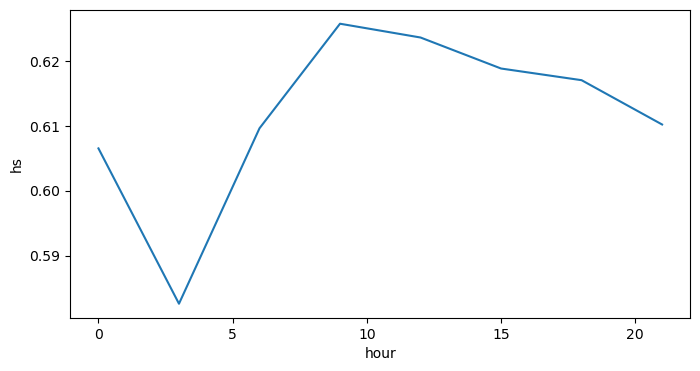

In [27]:
dfhourlymean['hs'].mean(dim=['lon','lat']).plot(ax=plt.subplots(figsize=(8,4))[-1])

<a href="#"><div align="center"><img src="https://foundations.projectpythia.org/_images/xarray-split-apply-combine.jpeg" width=400px></div></a>

##### resample

In [28]:
dsetres = dsetsel.resample(time='1D')
dsetresmean = dsetres.mean()
dsetresmean

<xarray.Dataset> Size: 694kB
Dimensions:  (time: 32, lat: 21, lon: 129)
Coordinates:
  * lat      (lat) float32 84B -7.5 -7.438 -7.375 -7.312 ... -6.375 -6.312 -6.25
  * lon      (lon) float32 516B 110.0 110.1 110.1 110.2 ... 117.9 117.9 118.0
  * time     (time) datetime64[ns] 256B 2025-01-01 2025-01-02 ... 2025-02-01
Data variables:
    hs       (time, lat, lon) float64 694kB nan nan nan nan ... 1.365 1.363 1.36
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

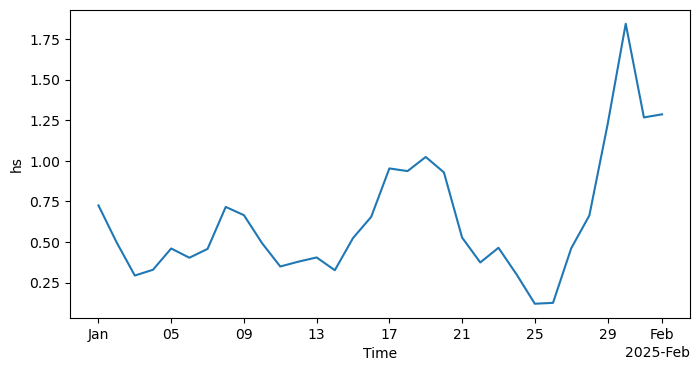

In [29]:
dsetresmean['hs'].mean(dim=['lon','lat']).plot(ax=plt.subplots(figsize=(8,4))[-1])

##### rolling

In [30]:
%%time

dsetrol = dsetsel.rolling(time=8, center=True)
dsetrol

CPU times: user 4.55 ms, sys: 20 μs, total: 4.57 ms
Wall time: 3.96 ms


DatasetRolling [time->8(center)]

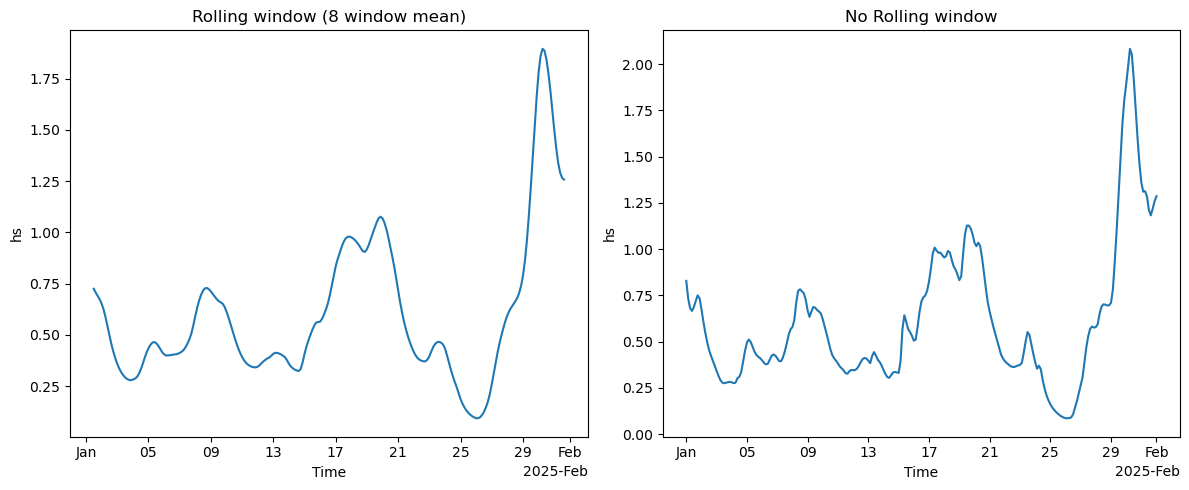

In [31]:
# PERBANDINGAN
fig, ax = plt.subplots(figsize=(12,5), ncols=2)
dsetrol.mean()['hs'].mean(['lon','lat']).plot(ax=ax[0])
dsetsel['hs'].mean(['lon','lat']).plot(ax=ax[1])
ax[0].set_title("Rolling window (8 window mean)")
ax[1].set_title("No Rolling window")
plt.tight_layout()
plt.show()